In [176]:
import pandas as pd

df_csv = pd.read_csv('SALES DATA/fct_invoice.csv')
df_json = pd.read_json('SALES DATA/dim_customer.json')

# [Easy 1] How many unique customers are there in the dataset?

In [178]:
df_csv.customer_id.nunique()

5191

# [Easy 2] What are the different categories of products available? How many unique categories are there?

In [179]:
categories = df_csv.category.unique()
num_categories = df_csv.category.nunique()

print(categories, num_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] 8


# [Easy 3] Which payment method is the most popular? How many times was it used?

In [180]:
payment_method = df_csv.payment_method.value_counts()
popular_pm = payment_method.idxmax()
ppm_count = payment_method[popular_pm]

print(popular_pm, ppm_count)

Cash 44447


# [Medium 1] What are the three most popular categories, by total sales?

In [181]:
cat_total_sales = df_csv.groupby('category')['price'].sum()
top_3_sales = cat_total_sales.nlargest(3)

top_3_sales

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

# [Medium 2] What are the total sales attributed to customers over the age of 45?

In [185]:
df_merge = pd.merge(
    df_csv,
    df_json,
    how = 'inner',
    left_on = 'customer_id',
    right_on = 'id'
)

total_price = df_merge.quantity * df_merge.price
df_merge['total'] = total_price
over_45 = df_merge.loc[df_merge['age'] > 45]
over_45.total.sum()

82039768.15

# [Medium 3] How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this)

(<function matplotlib.pyplot.show(close=None, block=None)>,
 season
 fall      58997313.63
 spring    61795049.96
 summer    60878155.71
 winter    69835274.95
 Name: total, dtype: float64)

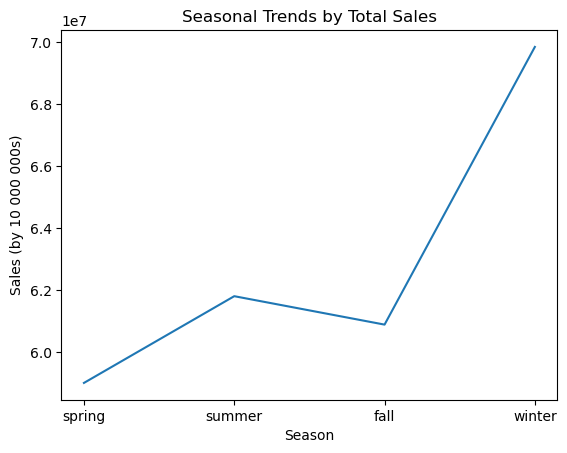

In [189]:
df_merge["invoice_date"] = pd.to_datetime(df_merge["invoice_date"])
seasons = ["winter", # winter in January
           "winter", # winter in February
           "spring", # spring in March
           "spring", # spring in April
           "spring", # spring in May
           "summer", # summer in June
           "summer", # summer in July
           "summer", # summer in August
           "fall", # fall in September
           "fall", # fall in October
           "fall", # fall in November
           "winter" # winter in December
          ]
months = df_merge.invoice_date.dt.month
month_by_season = dict(zip(range(1,13), seasons))
df_merge['season'] = df_merge.invoice_date.dt.month.map(month_by_season)
total_per_season = df_merge.groupby('season')['total'].sum()

import matplotlib.pyplot as plt
x_axis = ["spring", "summer", "fall", "winter"]
y_axis = total_per_season.values

plt.plot(x_axis, y_axis)
plt.title('Seasonal Trends by Total Sales')
plt.xlabel('Season')
plt.ylabel('Sales (by 10 000 000s)')
plt.show, total_per_season

# [Hard] Create a pivot table showing the breakdown of sales across these dimensions in this order: category, decade age range.

In [187]:
age_end = [10, 19, 29, 39, 49, 59, 69, 79, 89]
labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

df_merge['age_range'] = pd.cut(df_merge['age'], bins = age_ranges, labels = labels)

df_merge.pivot_table(
    values = 'total',
    columns = 'category', 
    index = 'age_range', 
    aggfunc = sum
)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
